In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from scipy.stats import *
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [2]:
hdb_resale = pd.read_csv('./hdb_resale_from_2017_outlier_removed.csv',index_col=0)
hdb_resale

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,remaining_lease_year,month_extract,year_extract,flat_type_room,flat_model_cat,storey_range_cat,town_cat,latitude,longitude
Unnamed: 0,,,,,,,,,,,,,,,,,,,,
0,2017-01,ANG MO KIO,4 ROOM,588C,ANG MO KIO ST 52,13 TO 15,90.0,DBSS,2011,93 years 08 months,688000.0,93.666667,1,2017,4,1,4,2,1.371869,103.853483
1,2017-01,ANG MO KIO,4 ROOM,588D,ANG MO KIO ST 52,19 TO 21,91.0,DBSS,2011,93 years 07 months,730000.0,93.583333,1,2017,4,1,6,2,1.372107,103.855847
2,2017-01,ANG MO KIO,4 ROOM,588D,ANG MO KIO ST 52,22 TO 24,91.0,DBSS,2011,93 years 07 months,756000.0,93.583333,1,2017,4,1,7,2,1.372107,103.855847
3,2017-01,ANG MO KIO,5 ROOM,588A,ANG MO KIO ST 52,10 TO 12,112.0,DBSS,2011,93 years 07 months,770000.0,93.583333,1,2017,5,1,3,2,1.372090,103.852693
4,2017-01,ANG MO KIO,5 ROOM,310A,ANG MO KIO AVE 1,10 TO 12,121.0,Improved,2012,94 years 08 months,832000.0,94.666667,1,2017,5,2,3,2,1.364956,103.843818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25629,2022-03,YISHUN,4 ROOM,504C,YISHUN ST 51,10 TO 12,92.0,Model A,2016,93 years 01 month,490000.0,93.083333,3,2022,4,3,3,24,1.416384,103.843373
25630,2022-03,YISHUN,4 ROOM,501B,YISHUN ST 51,04 TO 06,92.0,Model A,2018,94 years 11 months,510000.0,94.916667,3,2022,4,3,1,24,1.416384,103.843373
25631,2022-03,YISHUN,5 ROOM,502D,YISHUN ST 51,10 TO 12,112.0,Improved,2018,94 years 11 months,710000.0,94.916667,3,2022,5,2,3,24,1.416384,103.843373


In [3]:
hdb_resale[["floor_area_sqm", "lease_commence_date", "resale_price", "remaining_lease_year", "month_extract", "year_extract", "flat_type_room", "flat_model_cat", "storey_range_cat", "town_cat"]].describe()

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_year,month_extract,year_extract,flat_type_room,flat_model_cat,storey_range_cat,town_cat
count,23860.000000,23860.000000,23860.000000,23860.000000,23860.000000,23860.000000,23860.000000,23860.000000,23860.000000,23860.000000
mean,89.865256,2014.471626,494209.419136,93.818196,6.709262,2019.708173,3.923847,3.012741,2.939899,16.601593
std,16.480263,1.693247,131673.711763,1.323937,3.482938,1.386453,0.722792,0.761795,2.211896,5.521638
min,38.000000,2010.000000,195000.000000,89.833333,1.000000,2017.000000,2.000000,0.000000,0.000000,2.000000
25%,89.000000,2013.000000,408000.000000,93.083333,4.000000,2019.000000,4.000000,3.000000,1.000000,14.000000
50%,93.000000,2015.000000,475000.000000,94.166667,7.000000,2020.000000,4.000000,3.000000,3.000000,17.000000
75%,95.000000,2016.000000,570000.000000,94.833333,10.000000,2021.000000,4.000000,3.000000,4.000000,20.000000
max,149.000000,2019.000000,863500.000000,97.750000,12.000000,2022.000000,5.000000,7.000000,15.000000,24.000000


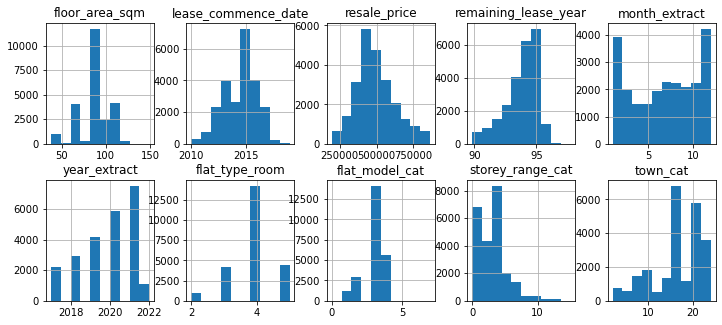

In [4]:
data = hdb_resale[["floor_area_sqm", "lease_commence_date", "resale_price", "remaining_lease_year", "month_extract", "year_extract", "flat_type_room", "flat_model_cat", "storey_range_cat", "town_cat"]]
data.hist(layout=(3, 5), figsize=(12, 8))
plt.show()

In [5]:
data.corr()

,floor_area_sqm,lease_commence_date,resale_price,remaining_lease_year,month_extract,year_extract,flat_type_room,flat_model_cat,storey_range_cat,town_cat
floor_area_sqm,1.000000,0.089245,0.588962,0.064908,0.012221,0.036462,0.988038,-0.121380,-0.079175,0.053833
lease_commence_date,0.089245,1.000000,0.058922,0.616927,0.033528,0.617960,0.124415,0.005122,-0.070846,0.053263
resale_price,0.588962,0.058922,1.000000,-0.104979,0.007865,0.167113,0.618532,-0.173304,0.268693,-0.240599
remaining_lease_year,0.064908,0.616927,-0.104979,1.000000,-0.008442,-0.195216,0.075360,0.066845,-0.026504,0.054296
month_extract,0.012221,0.033528,0.007865,-0.008442,1.000000,-0.155055,0.014114,-0.002442,-0.010647,0.007332
year_extract,0.036462,0.617960,0.167113,-0.195216,-0.155055,1.000000,0.071133,-0.081242,-0.051368,-0.009396
flat_type_room,0.988038,0.124415,0.618532,0.075360,0.014114,0.071133,1.000000,-0.185264,-0.068482,0.049286
flat_model_cat,-0.121380,0.005122,-0.173304,0.066845,-0.002442,-0.081242,-0.185264,1.000000,-0.034270,0.097541
storey_range_cat,-0.079175,-0.070846,0.268693,-0.026504,-0.010647,-0.051368,-0.068482,-0.034270,1.000000,-0.147017
town_cat,0.053833,0.053263,-0.240599,0.054296,0.007332,-0.009396,0.049286,0.097541,-0.147017,1.000000


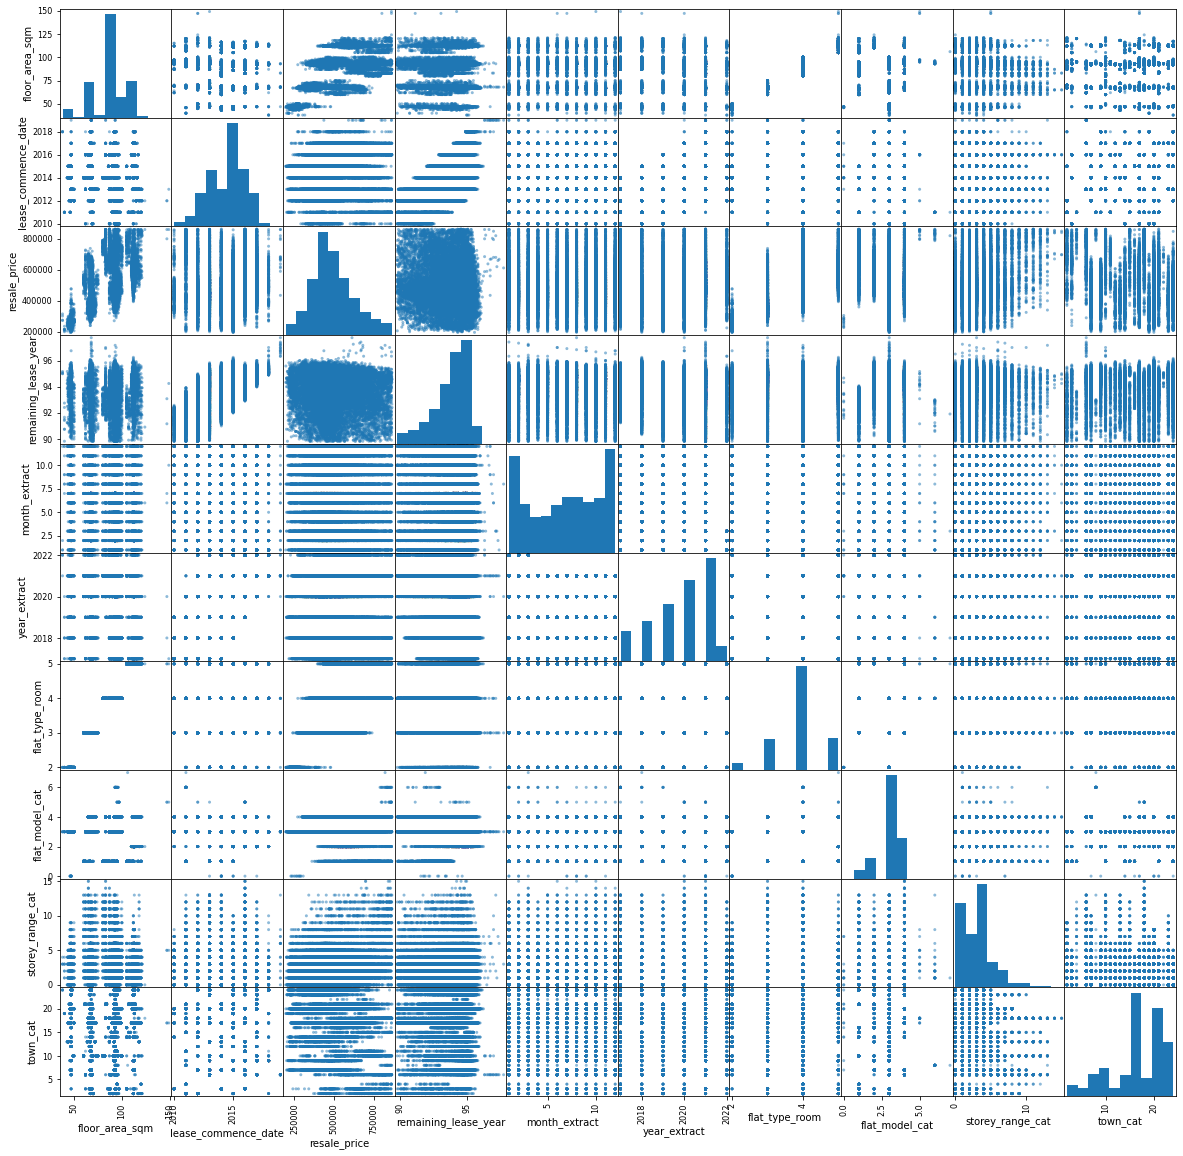

In [6]:
scatter_matrix(data, figsize=(20, 20))
plt.show()

In [20]:
def bivariate(variable_one, variable_two):
    xs = data[variable_one]
    ys = data[variable_two]
    plt.figure(figsize=(8,5))
    m, b = np. polyfit(xs, ys, 1)
    plt.plot(xs,m*xs+b, color = 'red')
    plt.scatter(xs, ys, color='blue')
    plt.title(f"Plot of {variable_two} vs {variable_one}", fontsize=15)
    plt.xlabel(variable_one, fontsize=12)
    plt.ylabel(variable_two, fontsize=12)

    print("Correlation Coefficient:")
    print(np.corrcoef(data[variable_one], data[variable_two]))

Correlation Coefficient:
[[1.         0.58896174]
 [0.58896174 1.        ]]


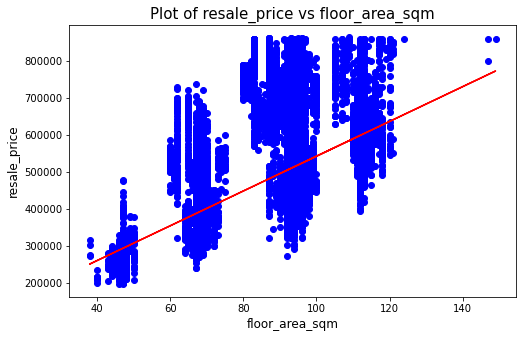

In [23]:
bivariate("floor_area_sqm", "resale_price")

Correlation Coefficient:
[[ 1.         -0.10497877]
 [-0.10497877  1.        ]]


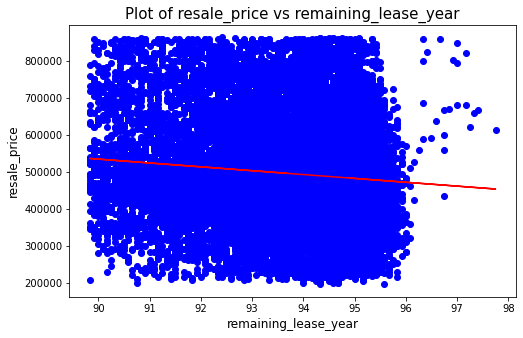

In [21]:
bivariate("remaining_lease_year", "resale_price")

Correlation Coefficient:
[[1.         0.61853231]
 [0.61853231 1.        ]]


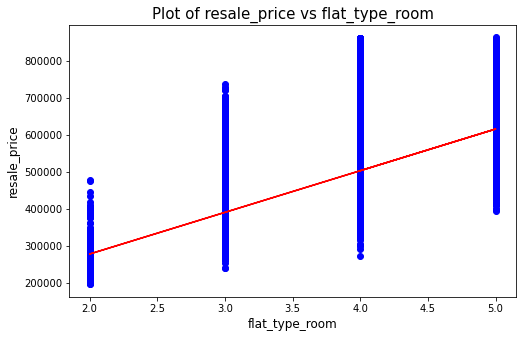

In [22]:
bivariate("flat_type_room", "resale_price")

Correlation Coefficient:
[[1.         0.26869307]
 [0.26869307 1.        ]]


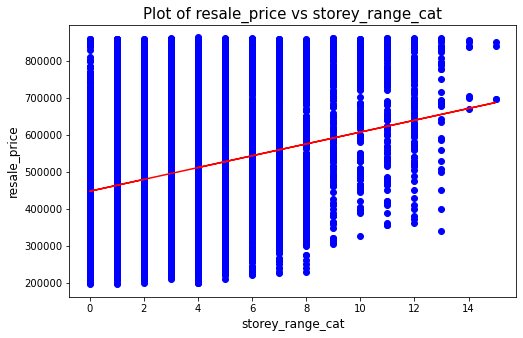

In [24]:
bivariate("storey_range_cat", "resale_price")

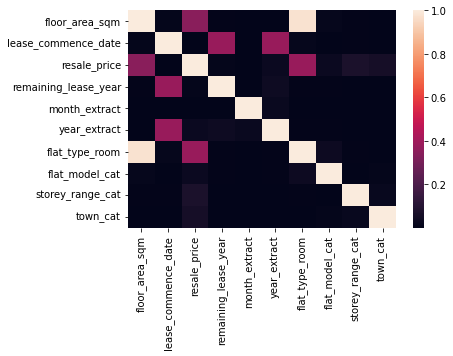

In [25]:
r2 = data.corr()**2
sns.heatmap(r2)
plt.show()

In [26]:
def model_evaluation(model):
  # predict based on test set
  y_pred = model.predict(X_test)

  # compare with ground truth
  mae = mean_absolute_error(y_test, y_pred)
  ave = np.mean(y_test["resale_price"])
  rmse = mean_squared_error(y_test, y_pred, squared = False)  # setting squared = False returns the square-root 

  return mae, ave, rmse

In [9]:
import statsmodels.api as sm

In [27]:
X = sm.add_constant(hdb_resale["floor_area_sqm"])
y = hdb_resale["resale_price"]
ols = sm.OLS(y.values, X)
ols_result = ols.fit()
ols_result.summary()

/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                 1.267e+04
Date:                Wed, 13 Apr 2022   Prob (F-statistic):               0.00
Time:                        16:48:13   Log-Likelihood:            -3.1004e+05
No. Observations:               23860   AIC:                         6.201e+05
Df Residuals:                   23858   BIC:                         6.201e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           7.133e+04   3819.356     18.677      0.000    6.38e+04    7.88e+04
floor_area_sqm  4705.6762     41.804    112.566      0.000    4623.738    4787.614
==============================================================================
Omnibus:                     5228.816   Durbin-Watson:                   0.374
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9892.360
Skew:                           1.364   Prob(JB):                         0.00
Kurtosis:                       4.584   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
def get_tstat(a):
    y = hdb_resale["resale_price"]
    X = sm.add_constant(hdb_resale[a])
    ols = sm.OLS(y, X)
    ols_result = ols.fit()
    print("slope coefficient: ", end="")
    print(ols_result.params[1])
    print("std error: ", end="")
    print(ols_result.bse[1])
    print("t-stat: ", end="")
    print(ols_result.tvalues[1])
    print("---")

In [31]:
X_list = ["floor_area_sqm", "lease_commence_date", "remaining_lease_year", "month_extract", "year_extract", "flat_type_room", "flat_model_cat", "storey_range_cat", "town_cat"]
print("t-crit: +- 1.96")
print("---")
for i in X_list:
    print(i)
    get_tstat(i)

t-crit: +- 1.96
---
floor_area_sqm
slope coefficient: 4705.676169134169
std error: 41.80380173493394
t-stat: 112.56574698568154
---
lease_commence_date
slope coefficient: 4581.985700953865
std error: 502.58156004701783
t-stat: 9.116899753594636
---
remaining_lease_year
slope coefficient: -10440.787934918671
std error: 640.336714094083
t-stat: -16.305152750283554
---
month_extract
slope coefficient: 297.3262603462208
std error: 244.75009038845394
t-stat: 1.214815732547109
---
year_extract
slope coefficient: 15871.033045233926
std error: 606.214591386546
t-stat: 26.180552680088724
---
flat_type_room
slope coefficient: 112680.2688557359
std error: 926.7402767436353
t-stat: 121.58775407028816
---
flat_model_cat
slope coefficient: -29954.984106836928
std error: 1102.1031374464287
t-stat: -27.179837429954677
---
storey_range_cat
slope coefficient: 15995.239768498417
std error: 371.2320028047698
t-stat: 43.086909662016076
---
town_cat
slope coefficient: -5737.537249548455
std error: 149.85298

/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/minhvu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/Users/minhvu/opt/anaconda3/lib/pyth

In [35]:
X_list = ["floor_area_sqm", "lease_commence_date", "remaining_lease_year", "month_extract", "year_extract", "flat_type_room", "flat_model_cat", "storey_range_cat", "town_cat"]
X_list.remove("month_extract")
X = hdb_resale[X_list]
y = hdb_resale[["resale_price"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [36]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression().fit(X_train, y_train)
model1_r2 = model1.score(X_train, y_train)
model1_r2 = model1.score(X, y)
coef1 = model1.coef_
bias1 = model1.intercept_

print("Linear Regression ")
print("--------------------------")
print(f"Features : {X_train.columns.tolist()}")
print(f"Coefficients: {coef1}")
print(f"Intercept : {bias1}")
print(f"Coeff of Determination : {model1_r2}")

Linear Regression 
--------------------------
Features : ['floor_area_sqm', 'lease_commence_date', 'remaining_lease_year', 'year_extract', 'flat_type_room', 'flat_model_cat', 'storey_range_cat', 'town_cat']
Coefficients: [[ -6292.21666431  14836.57280743 -27336.66282302  -5421.27673775
  261845.45477106   7975.84684049  16350.34669284  -5482.27102776]]
Intercept : [-16322863.7931391]
Coeff of Determination : 0.5755941213378016


In [37]:
def predict_on_x_test(x_test_copy, y_test_copy, bias1, coef1, features):
    formula1 = bias1
    for idx in range(len(features)):
        formula1 += coef1[0][idx]*x_test_copy[features[idx]]

    x_test_copy['Predicted_Price'] = round(formula1, 1)
    y_test_copy['Predicted_Price'] = x_test_copy['Predicted_Price']
    y_test_copy['Difference in %'] = round((y_test_copy['Predicted_Price'] - y_test_copy['resale_price']) / y_test_copy['resale_price'] * 100, 2)
    print(y_test_copy)

In [38]:
X_test_copy1 = X_test.copy()    # Store a copy of X_test
y_test_copy1 = y_test.copy()   # Stores a copy of y_test

print()
print("Comparison of Actual vs Predicted Prices")
print()
predict_on_x_test(X_test_copy1, y_test_copy1, bias1[0], coef1, X_list)


Comparison of Actual vs Predicted Prices

            resale_price  Predicted_Price  Difference in %
Unnamed: 0                                                
21246           385000.0         457296.7            18.78
21431           365000.0         440307.9            20.63
14239           488000.0         572527.2            17.32
19735           835000.0         676640.0           -18.97
17065           585000.0         606168.7             3.62
...                  ...              ...              ...
3363            600000.0         598880.1            -0.19
14959           355000.0         368340.3             3.76
23461           495000.0         518750.1             4.80
4751            333000.0         332995.4            -0.00
4457            325000.0         322799.3            -0.68

[5965 rows x 3 columns]


In [42]:
def get_formula(x_test_copy, y_test_copy, bias1, coef1, features):
    formula1 = bias1
    for idx in range(len(features)):
        formula1 += coef1[0][idx]*x_test_copy[features[idx]]
    return formula1

y_test_copy1["Predicted Price"] = get_formula(X_test_copy1, y_test_copy1, bias1[0], coef1, X_list)
y_test_copy1["Difference in Price"] = y_test_copy1["Predicted Price"] - y_test_copy1["resale_price"]
y_test_copy1[["Predicted Price", "resale_price", "Difference in Price"]]

,Predicted Price,resale_price,Difference in Price
Unnamed: 0,,,
21246,457296.697934,385000.0,72296.697934
21431,440307.935809,365000.0,75307.935809
14239,572527.231053,488000.0,84527.231053
19735,676640.040316,835000.0,-158359.959684
17065,606168.743727,585000.0,21168.743727
...,...,...,...
3363,598880.072627,600000.0,-1119.927373
14959,368340.285274,355000.0,13340.285274
23461,518750.103179,495000.0,23750.103179


In [43]:
from scipy import stats

n = y_test_copy1.shape[0]
alpha = 0.05
mu = 0
var = y_test_copy1.var()["Difference in Price"]
test_statistic = (y_test_copy1.mean()["Difference in Price"] - mu) / np.sqrt(var / n)

degree_of_freedom = n - 1
t_critical = stats.t.isf(alpha / 2, degree_of_freedom)        # Two-sided --> a / 2
p_value = stats.t.sf(abs(test_statistic), degree_of_freedom)

print(f"t value : {test_statistic}")
print(f"critical value : {t_critical}")
print(f"p value : {p_value}")

t value : -0.7806693909340423
critical value : 1.9603618290333698
p value : 0.2175139756858951


In [41]:
model_evaluation(model1)

(66132.03420483413, 493088.01305616094, 86477.4639320842)